In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches

DataPath='./Data/Data_F45_Stoch_TMEVm'


%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath):
    os.makedirs(DataPath)
if not os.path.isfile(DataPath+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F45_Stoch_TMEVm.ipynb

In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_3examples = [viridis(0.05)[0:3],viridis(0.5)[0:3],viridis(0.9)[0:3]]
# alpha_value=0.45
size_scaler = 2.5
alp=0.1 # alpha value for transparent lines N=30

h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

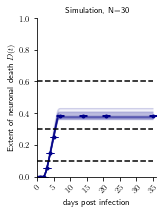

In [4]:
data = load_animal_model_data('Kirkman_et_al_2010')
days_vect=data['days_vect']
N=30
D_array=np.zeros([N,len(days_vect)])

for ii in range(0,N): # Here we gather and extract data about N and B values on days 5,7,14,21,35
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()
    D_array[ii]=D_vec[np.array((np.array(days_vect)/dt),'i')]
    
D_mean_vect=np.mean(D_array,axis=0)
D_std_vect=np.std(D_array,axis=0)
D_sem_vect=D_std_vect/np.sqrt(N)

# plotting #

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1)  

plt.bar(days_vect, D_mean_vect,color='white',
       yerr=D_sem_vect,
       align='center',
       alpha=1,
       ecolor='darkblue',
       capsize=10/size_scaler)
plt.plot(days_vect, D_mean_vect,'.',color='darkblue',markersize=15/size_scaler)


for ii in range(0,N): # Here we gather and extract data about N and B values on days 5,7,14,21,35
    listt=np.load(DataPath+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    D_vec=listt[1]['D_vec'].copy()
    plt.plot(t_vec[0:int(days_vect[-1]/dt)],D_vec[0:int(days_vect[-1]/dt)],color='darkblue',alpha=alp)

plt.plot([0,t_vec[int(days_vect[-1]/dt)]],[0.1,0.1],'k--') # plotting horizontal lines for score border values
plt.plot([0,t_vec[int(days_vect[-1]/dt)]],[0.3,0.3],'k--')
plt.plot([0,t_vec[int(days_vect[-1]/dt)]],[0.6,0.6],'k--')

plt.xlim([0,days_vect[-1]+1])
plt.ylim([0,1])
plt.xticks(np.arange(0,days_vect[-1]+1,5))
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation(45)

plt.xlabel('days post infection')
plt.ylabel(r'Extent of neuronal death $D(t)$')
plt. title (r'Simulation, N=30',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(1.5*w,2*w)  
fig.savefig('Figures/Supplementary/Fig_S12.pdf')